# Class 2B — By Your Powers Combined

This is the team activity for **Class 2B** (Thursday, Sep. 2, 2021).

When you have completed the activity, upload the notebook and a PDF export to the *Weeek 2 Assignment* in Canvas, and make sure all team members have a copy of the final notebook.

This notebook is intended for you to fill out. The instructions are written inline, with empty cells for you to work. Feel free to add additional code and/or markdown cells as needed, to present the results and to provide appropriate interpretive commentary.

## 🗄 Data

This assignment uses Version 1.3.0 of the [Global Power Plant Database](https://datasets.wri.org/dataset/globalpowerplantdatabase).  Download and unpack those files.

One of the files, `A_Global_Database_of_Power_Plants.pdf`, contains documentation about the data.

## 🛠 Setup

As usual, we need to start by setting up our Python environment.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Turn on Matplotlib rendering:

In [2]:
%matplotlib inline

And read the data, using `pandas.read_csv`:

In [3]:
pp_data=pd.read_csv('global_power_plant_database_v_1_3/global_power_plant_database.csv',low_memory=False)
pp_data

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.3220,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.6700,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.6230,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.5560,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.6410,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34931,ZMB,Zambia,Ndola,WRI1022386,50.0,-12.9667,28.6333,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,183.79,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
34932,ZMB,Zambia,Nkana,WRI1022384,20.0,-12.8167,28.2000,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,73.51,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
34933,ZMB,Zambia,Victoria Falls,WRI1022380,108.0,-17.9167,25.8500,Hydro,NaN,NaN,...,575.78,575.78,548.94,579.90,578.32,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
34934,ZWE,Zimbabwe,Hwange Coal Power Plant Zimbabwe,GEODB0040404,920.0,-18.3835,26.4700,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,2785.10,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1


## 🏡 Structural Description

How many **observations** are in this data?

In [4]:
len(pp_data)

34936

How many **variables** are in this data?

In [5]:
len(pp_data.columns)

36

What are some of the variables in this data? Look at both the column names, and the documentation (particularly Table 3), to identify some of the variables we have here.

In [6]:
pp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         34936 non-null  object 
 1   country_long                    34936 non-null  object 
 2   name                            34936 non-null  object 
 3   gppd_idnr                       34936 non-null  object 
 4   capacity_mw                     34936 non-null  float64
 5   latitude                        34936 non-null  float64
 6   longitude                       34936 non-null  float64
 7   primary_fuel                    34936 non-null  object 
 8   other_fuel1                     1944 non-null   object 
 9   other_fuel2                     276 non-null    object 
 10  other_fuel3                     92 non-null     object 
 11  commissioning_year              17447 non-null  float64
 12  owner                           

Do the Pandas types match what you would expect from the expected data type? Are there any surprises?

## ❓ Questions

Identify **2 questions** that you could try to answer with this data, and write them in the Markdown cell below.

What is the biggst power producing souces?


## 🙋‍♀️ Check-In Breakpoint 🙋‍♂️

This is where we're going to do an initial check-in and cross-team discussion.

## Distributions

What is the distribution of power production capacity **per plant**? Describe graphically and numerically.

<AxesSubplot:ylabel='Frequency'>

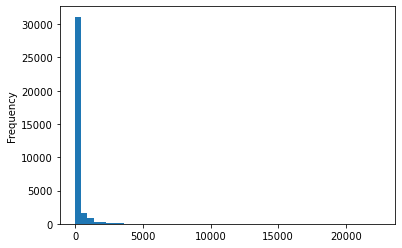

In [11]:
cap=pp_data.groupby("name")["capacity_mw"].sum()
cap.describe()
cap.plot.hist(bins=50)


What is the distribution of power production capacity **per country**? Describe graphically and numerically.

<AxesSubplot:ylabel='Frequency'>

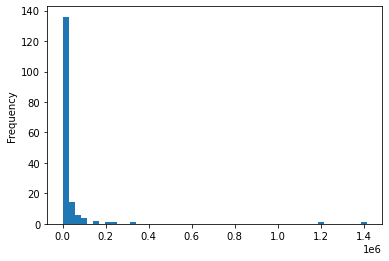

In [8]:
cap=pp_data.groupby("country")["capacity_mw"].sum()
cap.describe()
cap.plot.hist(bins=50)

## Exploration

How many power plants are there of each fuel type?

> **Hint:** This is easiest to view with a **horizontal bar plot**.  You can do this by using Pandas group-by, and calling `.plot.barh()` on the resulting series; or by using Seaborn's `countplot`, with `y='primary_fuel'` instead of `x='primary_fuel'`.

<AxesSubplot:ylabel='primary_fuel'>

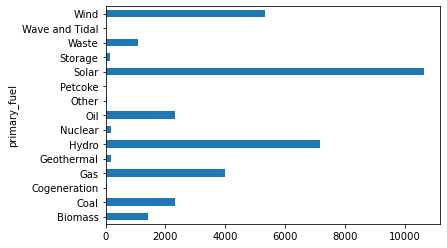

In [17]:
ftp=pp_data.groupby('primary_fuel')['name'].count()
ftp.plot.barh()

How much **total production capacity** is there of each fuel type?

<AxesSubplot:ylabel='primary_fuel'>

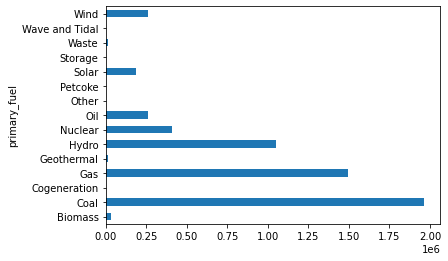

In [20]:
ftp=pp_data.groupby('primary_fuel')['capacity_mw'].sum()
ftp.plot.barh()

## ❔ Question

Pick one of the questions (either one of yours, or one of the other teams'). I recommend picking a simple one! State the question:

Describe, in English, a precise mechanism by which you will compute this measurement (including the variable(s), grouping, aggregates, etc. involved):

Attempt to answer it with the tools we have seen so far:

## 🏁 We're Done!

Submit to Canvas